# Jupyter Notebooks for the book: The Resonant Tunneling Diode photonics: Devices and applications 2nd Edition

#Chapter 2: Transfer Matrix Method calculates energy dependent transmission probability $T(E)$ for $Al_xGa_{1-x}AS$ RTDs

Charlie Ironside, Bruno Romeiria and Jose Figueiredo
First edition at http://dx.doi.org/10.1088/2053-2571/ab3a9a

Notebook by :- Prof. Charlie Ironside,Department of Physics and Astronomy,Curtin University, Bentley Campus,Western Australia 6102

email: Charlie.Ironside@curtin.edu.au

web page address:http://oasisapps.curtin.edu.au/staff/profile/view/Charlie.Ironside

Transfer matrix method used to calculate electron energy dependent transmission through an  $𝐴𝑙_𝑥𝐺𝑎_{1−𝑥}𝐴𝑠$ Resonant Tunneling Diode (RTD)
This notebook adapts code from the following

https://github.com/natsunoyuki/blog_posts/blob/main/physics/Transfer%20Matrices%20in%20Python.ipynb

https://github.com/natsunoyuki/blog_posts/tree/main/physics

to calculate the probability transmission,  𝑇(𝐸) , through  $𝐴𝑙_𝑥𝐺𝑎_{1−𝑥}𝐴𝑠$  RTDs as a function of electron energy

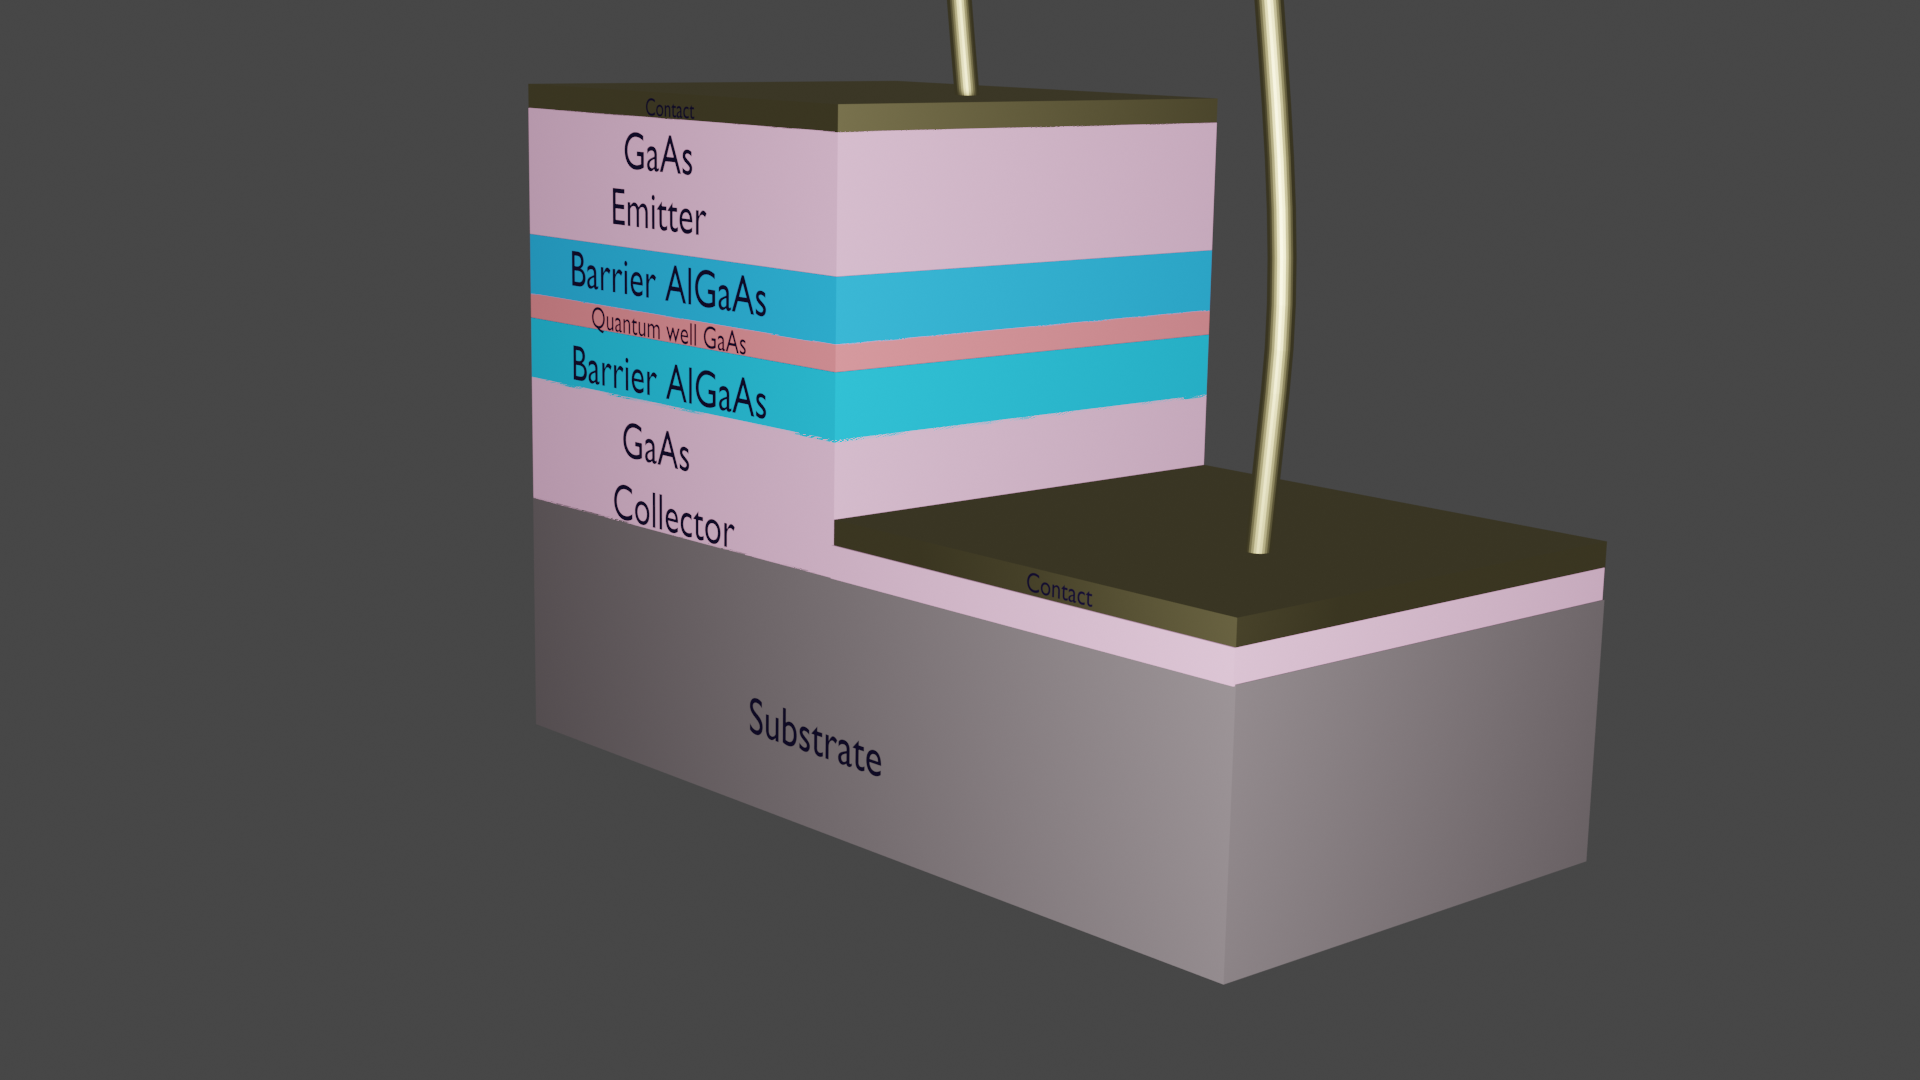

# Transfer Matrices in Python

<a href="https://en.wikipedia.org/wiki/Transfer_matrix" target="_blank">Transfer matrices</a> are one of the many methods used to solve for the propagation of waves across a system. For example, this method can be used in quantum mechanics to solve for the <a href="https://en.wikipedia.org/wiki/Schrödinger_equation" target="_blank">Schrödinger equation</a>, as well as for the propagation of <a href="https://en.wikipedia.org/wiki/Transfer-matrix_method_(optics)" target="_blank">electromagnetic waves</a>. Simply put, the transfer matrix __T__ is a 2 × 2 matrix that relates the complex quantum mechanical wave function at position __x__<sub>0</sub> to another position at __x__<sub>1</sub> through the linear relation: 

__ψ__(__x__<sub>0</sub>) = __T__(__x__<sub>1</sub>, __x__<sub>0</sub>)__ψ__(__x__<sub>1</sub>). 

Here we shown how transfer matrices are used to calculate the transmission probability,$T(E)$, of $Al_xGa_{1-x}As/GaAs/Al_xGa_{1-x}As$ resonant tunnelling diodes.

***

# References
### (1)See Chpt 2 of *The Physics and Applications of Resonant Tunnelling Diodes*

H. Mizuta and T. Tanoue

http://dx.doi.org/10.1017/CBO9780511629013

###(2)Quantum Mechanics for Scientists and Engineers

D. A. B. Miller

Publisher: Cambridge university press 2008 


### (3) The Transfer Matrix Method and the Theory of Finite Periodic Systems. From Heterostructures to Superlattices

P. Pereyra

Physica Status Solidi B-Basic Solid State Physics 2022 Vol. 259 Issue 3 Pages 41
http://dx.doi.org/10.1002/pssb.202100405

### (4) A simple analytical model for the resonant tunneling diode based on the transmission peak and scattering effect

S. L. Yadav and H. Najeeb-ud-din

Journal of Computational Electronics 2020 Vol. 19 Issue 3 Pages 1061-1067
http://dx.doi.org/10.1007/s10825-020-01531-4

## (5)Optimum device parameters to attain the highest peak to valley current ratio (PVCR) in resonant tunneling diodes (RTD)

S. Ipsita, P. K. Mahapatra and P. Panchadhyayee

Physica B-Condensed Matter 2021 Vol. 611 Pages 13
http://dx.doi.org/10.1016/j.physb.2020.412788

# Section 1 
Download the required packages

In [ ]:
import numpy as np
from numpy.lib.scimath import sqrt
import matplotlib.pyplot as plt
from scipy import linalg
import ipywidgets as widgets
from scipy import constants

# The transfer matrices
(1)Define the transfer matrix for a jump in potential

(2)Define the transfer matrix for propagtion in potential 

(3)Define how the transfer matrix for a series of jumps and propagtion is calculated

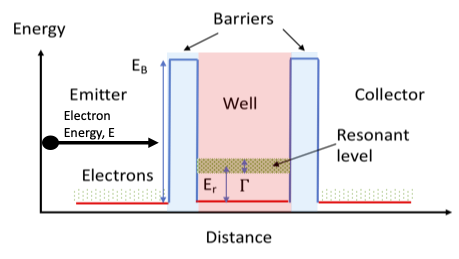

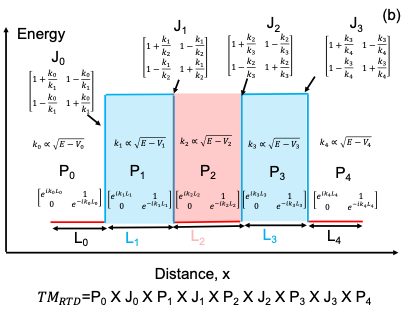

k is the electron wavector where
$k=\frac{\sqrt(2m^*m_e)}{\hbar}\sqrt(E-V)$

In the section below we ignore the scaling factor $\frac{\sqrt(2m_e)}{\hbar}$ which are includes only fundamental constants

But do include the effective mass $m^*$ which depends on x the Al fraction in $Al_xGa_{1-x}As$



In [ ]:

def jump(k_0, k_1):
    """
    Calculates the transfer matrix for jumps across
    potential steps.
 
    Inputs
    ------
    k_0: wave number on the left of the step.
    k_1: wave number on the right of the step.

    Returns
    -------
    J: transfer matrix for jumps.
    """
    
    if k_1 == 0: # to address zero division...
        k_1 = k_0 * 0.01

    J = np.array([[1 + k_0 / k_1, 1 - k_0 / k_1], 
                  [1 - k_0 / k_1, 1 + k_0 / k_1]])
    return J / 2.0
def propagation(k, L):
    """
    Calculates the transfer matrix for propagation
 
    Inputs
    ------
    k: wave number 
    L: propagation length

    Returns
    -------
    T: transfer matrix for propagation.
    """
    P = np.array([[np.exp(1j * k * L), 0], 
                  [0, np.exp(-1j * k * L)]])
    return P
def transfer_matrix(E, V, L, V0,eff_mass):
#def transfer_matrix(E, V, L, V0):
    """
    This function calculates the transfer matrix 
    for a series of quantum potentials.
    
    This code assumes that V0 is the same on both 
    sides of the potential well.
    
    Inputs
    ------
    E: float, particle energy.
    V: np.array, potential steps.
    L: np.array, potential step lengths.
    V0: float, potential on both sides of the well.
    
    Returns
    -------
    transfer: np.array, 2 x 2 transfer matrix.
    """
    #V0=0
    assert len(V) == len(L)
    N = len(L)
    V = np.append(V, V0) 
    k = sqrt(E - V)

    #Calculate the first potential jump from V0 to V[0]
    #transfer = jump(sqrt(E - V0), k[0])
    #transfer = jump(sqrt(eff_mass[0])*sqrt(E - V0), sqrt(eff_mass[0])*k[0])
    transfer = np.identity(2)
    # Loop over the remaining potential steps
    #print(N)
    for n in range(N):
        k[n]=k[n]*sqrt(eff_mass[n])
        #print(n,V[n],L[n])
        # Translate across V[n]:
        Pro = propagation(k[n], L[n])
        # Jump from V[n] to V[n+1]:
        Jump = jump(k[n], k[n + 1])
        transfer = np.dot(Pro, transfer)
        transfer = np.dot(Jump, transfer)
        
        
    return transfer


## The  $Al_xGa_{1-x}As$ layers 
The RTD consists of layer of $Al_xGa_{1-x}As$ alloy, for example, a low band-gap $GaAs$ layer sandwiched between two $Al_xGa_{1-x}As$ layers.

Below is the code for  $Al_xGa_{1-x}As$ layers it takes in the x (Al) fraction and calculates the change in the energy band gap and effective mass for different Al fractions and it also requires the thickness of the layer for the transfer matrix calculation

see http://www.ioffe.ru/SVA/NSM/Semicond/AlGaAs/index.html
 

In [ ]:
#class for semiconductor (AlGaAs) alloy layers -see http://www.ioffe.ru/SVA/NSM/Semicond/AlGaAs/index.html and 
class AlGaAsLayer:
  def __init__(self,alloy,fraction,thick):
    self.alloy=alloy #name of alloy 
    self.fraction=fraction#fraction of Al in AlGaAs alloy
    self.thick=thick #thickness in nm
  def AlGaAsDeltaE(self):
      #from Mizuta & Tanoue Chpt 2 -calculates change in band-gap energy (deltaE)in eV from alloy fraction GaAs has deltaE=0
      beta=0.6
      if self.fraction<=0.45:
        deltaE=beta*1.247*self.fraction
      if self.fraction>0.45:
        deltaE=beta*(1.247*self.fraction+1.14*(self.fraction-0.45)**2)
      return deltaE
  def AlGaAseff_mass(self):
      #from Mizuta & Tanoue Chpt 2 -calculates change in electron effective mass (m_star) from alloy fraction
      m_star=(0.67+0.083*self.fraction)
      return m_star

#Transfer Matrix Method calculates $T(E)$ for $Al_xGa_{1-x}AS$ RTDs

Uses the transfer matrix method to calculate the transmission probability,$T(E)$

It plots the results; 

the first plot shows the lowest conduction band energy plotted as a function distance for the RTD layer structure. for pure $GaAs$, E=0

the second plot is calcualted fro mthe transfer matrix for the RTD structure and plots the transmission probability against electron energy, E

It uses sliders so that the user can adjust the parameters of the RTD layer structure. 

B1_L is the thickness of the first barrier

B1_X is the Al fraction of the first barrier

QW_L is the thickness of the quantum well

QW_L is the Al fraction of the first barrier (note keep Al fraction less than barriers Al fraction)

B2_L is the thickness of the first barrier

B2_X is the Al fraction of the first barrier


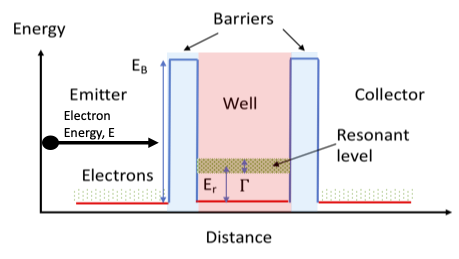

# Calculate the transfer matrix for the RTD for a range of electron energies

Both the semiconductor alloy ($Al_xGa_{1-x}AS$) band offsets and effective mass are taken into account

In [ ]:

def AlGaAsRTD(B1_L,B1_X,QW_L,QW_X,B2_L,B2_X):
    
    n=10000#number of energy points -sharper resonances need more points
    #please note for large n the time taken to update plots takes longer but the larger n is the more accurate the plot is particularly for sharp resonances.

    #Fundamental constants
    h=constants.Planck
    Pi=constants.pi
    h_bar=h/(2*Pi) #Planck's constant divided by 2pi, J S
    e_mass=constants.electron_mass #mass of electron in kg
    ev_J=constants.e#converts eV to Joules
    h_bar2=h_bar**2#h bar squared
    #Energy scaling
    scale_E=2*e_mass / h_bar2 *ev_J
    #Length Scaling
    scale_L=1e-9 #scale length to nm
    #Input RTD layers using AlGaAsLayer class
    firstlastthick=1 #input the first and last layer thickness in nm -the first last layers always have 0 Al fraction
    layer_0=AlGaAsLayer('AlGaAs',0.0,firstlastthick) # layer nearest surface (alloy,fraction,thickness)
    layer_1=AlGaAsLayer('AlGaAs',B1_X,B1_L) #  (alloy,fraction,thickness)
    layer_2=AlGaAsLayer('AlGaAs',QW_X,QW_L) #  (alloy,fraction,thickness)
    layer_3=AlGaAsLayer('AlGaAs',B2_X,B2_L) # (alloy,fraction,thickness)
    layer_4=AlGaAsLayer('AlGaAs',0.0,firstlastthick) # (alloy,fraction,thickness)

    #Layer Potential array

    V=np.array([layer_0.AlGaAsDeltaE(),layer_1.AlGaAsDeltaE(),layer_2.AlGaAsDeltaE(),layer_3.AlGaAsDeltaE(),layer_4.AlGaAsDeltaE()])*scale_E

    #Effective mass array
    eff_mass=np.array([layer_0.AlGaAseff_mass(),layer_1.AlGaAseff_mass(),layer_2.AlGaAseff_mass(),layer_3.AlGaAseff_mass(),layer_4.AlGaAseff_mass()])
    #eff_mass=np.ones(len(eff_mass))
    #Layer thickness array
    L = np.array([layer_0.thick,layer_1.thick,layer_2.thick,layer_3.thick,layer_4.thick])*scale_L
    #print('Total length of RTD= ',np.sum(L)/scale_L,' nm')

    #Take account of the different effective masses in each layer
    #V_eff=np.multiply(V,eff_mass)
    V_eff=V
    
    #set up energy versus distance graph       
    total_length=np.sum(L)
    x = np.linspace(0, total_length, 1000) 
    V_x=np.ones(len(x))*V[0]
    L_jump=np.zeros(len(L)+1)
    xsum=0
    for j in range(len(L)):
        L_jump[j]=xsum
        xsum=xsum+L[j]
    L_jump[-1]=L_jump[-2]+L[-1]
    for j in range(len(L_jump)-1):
      for i in range(len(x)):
          if x[i]>L_jump[j]and x[i]<L_jump[j+1]:
            V_x[i]=V[j]

    # Set up an array of containing a range of particle energies to consider
    E_max=np.max(V)#find the maxinum barrier energy
    E = np.linspace(E_max/100, E_max*1.5, n) #range goes from 1/100 maxium barrier energy to 1.5 times max barrier energy
    # Transmission coefficient results
    Tr = np.zeros(len(E))  #set up array for tranmission results 
    # This section calculates the transfer matrix as a funcion of electron input energy, T(E) for the RTD structure 
    #snd from the Transfer matrix, TM_RTD, it calculates the transmission  coefficient T(E)= 1/T11   
    for i in range(len(E)):
        TM_RTD = transfer_matrix(E[i], V_eff, L, V_eff[0],eff_mass)
        #TM_RTD = transfer_matrix(E[i], V_eff, L, 0)
        # Reflection coefficient
        #Re[i] = np.abs(TM_RTD[1, 0] / TM_RTD[1, 1]) ** 2 
        # Transmission coefficient
        #Tr[i] = np.abs(linalg.det(TM_RTD) / TM_RTD[0, 0]) ** 2 
        #Tr[i] = np.abs(1/ TM_RTD[0, 0]) ** 2 
        Tr[i] =1-(abs(TM_RTD[0, 1])**2)/ (abs(TM_RTD[0, 0]) ** 2) #see DAB Miller chpt 11 p286 -REMEMBER the Python index shift so TM_RTD[0, 0] is equavalent to T[1, 1] as found in the textbook
    
    
    #Plot results
    #Use colored rectangular patches to indicate alloy
    recty=np.max(V)/scale_E
    rectx1=firstlastthick
    rectx2=B1_L
    rectxx2=rectx1+rectx2
    rectx3=QW_L
    rectxx3=rectx1+rectx2+rectx3
    rectx4=B2_L
    rectxx4=rectx1+rectx2+rectx3+rectx4
    rectx5=firstlastthick
    #Write text on plot giving Al fraction
    texty=np.max(V)/scale_E *0.9
    value1='0'
    value2=str(B1_X)
    value3=str(QW_X)
    value4=str(B2_X)
    value5='0'
    alloy='$ Al=$'
    text1=alloy+value1
    text2=alloy+value2
    text3=alloy+value3
    text4=alloy+value4
    text5=alloy+value5
    textx1=layer_0.thick/3
    textx2=layer_0.thick+B1_L/4
    textx3=layer_0.thick+B1_L+QW_L/3
    textx4=layer_0.thick+B1_L+QW_L+B2_L/4
    textx5=layer_0.thick+B1_L+QW_L+B2_L+layer_0.thick/2

    #ploting lowest conduction band energy versus distance and transmission probability as a function of E
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
 
    fig,a = plt.subplots(2,sharex=False, figsize=(20, 8))
    a[0].add_patch(Rectangle((0, 0),rectx1, recty,color='red',alpha=0.05))
    a[0].add_patch(Rectangle((rectx1, 0),rectx2, recty,color='blue',alpha=0.05))
    a[0].add_patch(Rectangle((rectxx2, 0),rectx3, recty,color='red',alpha=0.05))
    a[0].add_patch(Rectangle((rectxx3, 0),rectx4, recty,color='blue',alpha=0.05))
    a[0].add_patch(Rectangle((rectxx4, 0),rectx5, recty,color='red',alpha=0.05))
    a[0].text(textx1,texty,text1, fontsize=14,color='red')
    a[0].text(textx2,texty,text2, fontsize=14,color='red')
    a[0].text(textx3,texty,text3, fontsize=14,color='red')
    a[0].text(textx4,texty,text4, fontsize=14,color='red')
    a[0].text(textx5,texty,text5, fontsize=14,color='red')
    a[1].set_title('(b) Log - RTD Transmission Probability versus Energy',fontsize=20) #writes title
    a[0].set_title('(a) RTD:Lowest conduction band energy versus distance for $Al_xGa_{1-x}As$ alloys',fontsize=18)#writes title
    a[1].semilogy(E/scale_E, Tr, 'r') #semilog plot
    a[0].plot(x/scale_L, V_x/scale_E,linewidth=5.0,color='k')
    a[1].set_xlabel('Energy [eV]',fontsize=20)
    a[0].set_xlabel('Distance [nm]',fontsize=20)
    a[1].set_ylabel('Transmission(E)',fontsize=20)
    a[0].set_ylabel('Energy [eV]',fontsize=20)
    a[0].grid(True)
    a[1].grid(True)
    fig.tight_layout()
    plt.show()
 #Use sliders to input RTD parameters   
B1_L=widgets.FloatSlider(min=0.5, max=10, value= 1.5,step=0.5,description='B1[nm]')
B1_Al=widgets.FloatSlider(min=0.0, max=1, value=.40,step=0.05, description='B1 Al')
QW_L=widgets.FloatSlider(min=0.5, max=10, value=2,step=0.5, description='QW[nm]')
QW_Al=widgets.FloatSlider(min=0.0, max=1, value=0,step=0.1, description='QW Al ')
B2_L=widgets.FloatSlider(min=0.5, max=10, value= 1.5,step=0.5, description='B2 width [nm]')
B2_Al=widgets.FloatSlider(min=0.0, max=1, value=.40,step=0.05,description='B2 Al')
widgets.interactive(AlGaAsRTD,B1_L=B1_L,B1_X=B1_Al,QW_L=QW_L,QW_X=QW_Al,B2_L=B2_L,B2_X=B2_Al)

interactive(children=(FloatSlider(value=1.5, description='B1[nm]', max=10.0, min=0.5, step=0.5), FloatSlider(v…